In [1]:
import pandas as pd
from matplotlib import pyplot as plt
# set the max columns to none
pd.set_option('display.max_columns', None)

In [2]:




df = pd.read_csv('data/NYCgov Poverty Measure Data/NYCgov_Poverty_Measure_Data__2018_.csv')

## Data Observations

In [18]:
df[df['Boro'] == 1 ].describe()

df.head()

,SERIALNO,SPORDER,PWGTP,WGTP,AGEP,CIT,REL,SCH,SCHG,SCHL,SEX,ESR,LANX,ENG,MSP,MAR,WKW,WKHP,DIS,JWTR,NP,TEN,HHT,AgeCateg,Boro,CitizenStatus,EducAttain,EST_Childcare,EST_Commuting,EST_EITC,EST_FICAtax,EST_HEAP,EST_Housing,EST_IncomeTax,EST_MOOP,EST_Nutrition,EST_PovGap,EST_PovGapIndex,Ethnicity,FamType_PU,FTPTWork,INTP_adj,MRGP_adj,NYCgov_Income,NYCgov_Pov_Stat,NYCgov_REL,NYCgov_Threshold,Off_Pov_Stat,Off_Threshold,OI_adj,PA_adj,Povunit_ID,Povunit_Rel,PreTaxIncome_PU,RETP_adj,RNTP_adj,SEMP_adj,SSIP_adj,SSP_adj,TotalWorkHrs_PU,WAGP_adj
0,1,1,95,95,31,1,0,1,0,22.0,2,1.0,2.0,NaN,6.0,5,1.0,60,2,12.0,1,2,6,2,2,1,4.0,0.0,1722.0000,0.0,9765.2422,0.0,1478.3278,33580.543,2642.8000,0.0,0.0,0.0,4,8,1,0.000,0.0000,81417.961,2,0,16241.600,2,13064,0.0,0.0,1,1,127650.22,0.0,0.0,0.0,0.0,0.000,2,127650.220
1,16,1,181,181,63,1,0,1,0,22.0,2,1.0,2.0,NaN,1.0,1,1.0,60,2,1.0,2,1,1,2,3,1,4.0,0.0,3840.8416,0.0,13950.3460,0.0,0.0000,95503.234,4766.7998,0.0,0.0,0.0,1,2,1,101309.700,2532.7424,228417.950,2,0,22900.654,2,16815,0.0,0.0,1,1,346479.19,0.0,0.0,0.0,0.0,0.000,2,182357.450
2,16,2,210,181,65,1,1,1,0,19.0,1,6.0,2.0,NaN,1.0,1,NaN,0,2,NaN,2,1,1,3,3,1,3.0,0.0,3840.8416,0.0,13950.3460,0.0,0.0000,95503.234,4766.7998,0.0,0.0,0.0,1,2,3,50654.852,2532.7424,228417.950,2,1,22900.654,2,16815,0.0,0.0,1,2,346479.19,0.0,0.0,0.0,0.0,12157.164,2,0.000
3,47,1,62,62,68,4,0,1,0,1.0,1,1.0,1.0,2.0,1.0,1,1.0,40,2,10.0,2,2,1,3,2,2,1.0,0.0,0.0000,0.0,9765.2422,0.0,2612.8022,27574.365,3218.8000,0.0,0.0,0.0,1,2,1,0.000,0.0000,117058.230,2,0,22900.654,2,15178,0.0,0.0,1,1,155003.84,0.0,0.0,0.0,0.0,27353.619,1,91178.727
4,47,2,71,62,63,4,1,1,0,1.0,2,1.0,1.0,1.0,1.0,1,1.0,40,2,10.0,2,2,1,2,2,2,1.0,0.0,0.0000,0.0,9765.2422,0.0,2612.8022,27574.365,3218.8000,0.0,0.0,0.0,1,2,1,0.000,0.0000,117058.230,2,1,22900.654,2,15178,0.0,0.0,1,2,155003.84,0.0,0.0,0.0,0.0,0.000,1,36471.492


## Data Analysis

In [4]:


#Data Analysis
class Codes:
    def __init__(self):
        #Borough Codes
        self.BRONX = 1
        self.BROOKLYN  = 2
        self.MANHATTAN = 3
        self.QUEENS = 4
        self.STATEN_ISLAND = 5
        
        #Ethinicity
        self.WHITE = 1 
        self.BLACK = 2  
        self.ASIAN = 3
        self.HISPANIC  = 4
        self.ETHNICITY_OTHER = 5
        
        
        #Poverty
        self.IS_POOR = 1
        self.NOT_POOR = 2
        
        #GENDER
        self.MALE = 1
        self.FEMALE = 2

races = [
    {'Name' : 'white', 'Code': codes.WHITE},
    {'Name' : 'black', 'Code': codes.BLACK},
    {'Name' : 'asian', 'Code': codes.ASIAN},
    {'Name' : 'hispanic', 'Code': codes.HISPANIC},
    {'Name' : 'other', 'Code': codes.ETHNICITY_OTHER}
]


codes = Codes()


In [5]:

        
class BoroStruct:
    def __init__(self, name, code, population):
        self.name = name
        self.code = code
        self.population = population
        self.pov_rate = -1
        
        self.white_rate = -1
        self.black_rate =  -1
        self.asian_rate = -1
        self.hispanic_rate  = -1
        self.other_rate = -1
        
        self.female_percent = -1
        self.male_percent = -1
        
    
    def set_female_percent(self, female_percent):
        self.female_percent = female_percent
        
    def set_male_percent(self, male_percent):
        self.male_percent = male_percent
        
    def set_pov_rate(self, pov_rate):
        self.pov_rate = pov_rate

    def set_white_rate(self, white_rate):
        self.white_rate = white_rate
    
    def set_black_rate(self, black_rate):
        self.black_rate = black_rate
    
    def set_asian_rate(self, asian_rate):
        self.asian_rate = asian_rate

    def set_hispanic_rate(self, hispanic_rate):
        self.hispanic_rate = hispanic_rate
    
    def set_other_rate(self, other_rate):
        self.other_rate = other_rate
        
    def to_string(self):
        return "Name: " + str(self.name) + "\nCode: " + str(self.code) +  "\nPopulation: " + str(self.population)+ "\nPorverty Rate: " + str(self.pov_rate) + "\nMale Percentage: " + str(self.male_percent) + "\nFemale Percentage: " + str(self.female_percent) + "\nWhite percentage: " + str(self.white_rate) + "\nBlack percentage: " + str(self.black_rate) + "\nAsian percentage: " + str(self.asian_rate) + "\nHispanic percentage: " + str(self.hispanic_rate) + "\nOther percentage: " + str(self.other_rate)

    
    
def calc_boro_population(boro_code):
    return len(df[df['Boro'] == boro_code])


boroughs = [
    BoroStruct("Bronx", codes.BRONX, calc_boro_population(codes.BRONX)),
    BoroStruct('Brooklyn', codes.BROOKLYN, calc_boro_population(codes.BROOKLYN)),
    BoroStruct('Manhattan', codes.MANHATTAN, calc_boro_population(codes.MANHATTAN)),
    BoroStruct('Queens', codes.QUEENS, calc_boro_population(codes.QUEENS)),
    BoroStruct('Staten Island', codes.STATEN_ISLAND, calc_boro_population(codes.STATEN_ISLAND))
] 


        
def gender_rate(boro, gender_code):
    return calc_category_percentage('SEX', boro, gender_code)

def poverty_rate(boro):
      return calc_category_percentage('Off_Pov_Stat', boro, codes.IS_POOR)

def ethinicity_rate(ethnicity_code, boro):
      return calc_category_percentage('Ethnicity', boro, ethnicity_code)

def calc_category_percentage(category, boro, value_to_check):
    count = len(df[(df['Boro'] == boro.code) & (df[category] == value_to_check)])
    return(count/boro.population)
  


for i in range(len(boroughs)):
    #Calculate Ethnicity Distribution
    curr = boroughs[i]
    boroughs[i].set_pov_rate(poverty_rate(curr))


    #Set ethinicity distribution
    boroughs[i].set_white_rate(ethinicity_rate(codes.WHITE, curr ))
    boroughs[i].set_black_rate(ethinicity_rate(codes.BLACK, curr ))
    boroughs[i].set_asian_rate(ethinicity_rate(codes.ASIAN, curr ))
    boroughs[i].set_hispanic_rate(ethinicity_rate(codes.HISPANIC, curr ))
    boroughs[i].set_other_rate(ethinicity_rate(codes.ETHNICITY_OTHER , curr ))
    
    #Calculate Gender Distribution
    boroughs[i].set_male_percent(gender_rate(curr, codes.MALE ))
    boroughs[i].set_female_percent(gender_rate(curr, codes.FEMALE))
    
    
    
def print_all():
    for i in range(len(boroughs)):
            print(boroughs[i].to_string() + "\n")
            
            
print_all()
    
    

Name: Bronx
Code: 1
Population: 9806
Porverty Rate: 0.24138282684070977
Male Percentage: 0.45105037732000813
Female Percentage: 0.5489496226799918
White percentage: 0.12900265143789516
Black percentage: 0.26504181113603914
Asian percentage: 0.05568019579849072
Hispanic percentage: 0.5304915357944116
Other percentage: 0.01978380583316337

Name: Brooklyn
Code: 2
Population: 24184
Porverty Rate: 0.15191862388355937
Male Percentage: 0.4676645716175984
Female Percentage: 0.5323354283824016
White percentage: 0.42747270922924246
Black percentage: 0.24044823023486603
Asian percentage: 0.1477836586172676
Hispanic percentage: 0.15216672179953689
Other percentage: 0.032128680119087

Name: Manhattan
Code: 3
Population: 9065
Porverty Rate: 0.13127413127413126
Male Percentage: 0.4675124103695532
Female Percentage: 0.5324875896304467
White percentage: 0.5075565361279647
Black percentage: 0.10854936569222283
Asian percentage: 0.13281853281853281
Hispanic percentage: 0.21853281853281853
Other percentag

In [6]:
df.columns

Index(['SERIALNO', 'SPORDER', 'PWGTP', 'WGTP', 'AGEP', 'CIT', 'REL', 'SCH',
       'SCHG', 'SCHL', 'SEX', 'ESR', 'LANX', 'ENG', 'MSP', 'MAR', 'WKW',
       'WKHP', 'DIS', 'JWTR', 'NP', 'TEN', 'HHT', 'AgeCateg', 'Boro',
       'CitizenStatus', 'EducAttain', 'EST_Childcare', 'EST_Commuting',
       'EST_EITC', 'EST_FICAtax', 'EST_HEAP', 'EST_Housing', 'EST_IncomeTax',
       'EST_MOOP', 'EST_Nutrition', 'EST_PovGap', 'EST_PovGapIndex',
       'Ethnicity', 'FamType_PU', 'FTPTWork', 'INTP_adj', 'MRGP_adj',
       'NYCgov_Income', 'NYCgov_Pov_Stat', 'NYCgov_REL', 'NYCgov_Threshold',
       'Off_Pov_Stat', 'Off_Threshold', 'OI_adj', 'PA_adj', 'Povunit_ID',
       'Povunit_Rel', 'PreTaxIncome_PU', 'RETP_adj', 'RNTP_adj', 'SEMP_adj',
       'SSIP_adj', 'SSP_adj', 'TotalWorkHrs_PU', 'WAGP_adj'],
      dtype='object')

## Race Distribution Across Boroughs 

In [50]:
race_composition = {
        'Boro': [],
        'Ethnicity': [],
        'Percentage': []}

race_comp_df = pd.DataFrame(race_composition)


for i in range(len(boroughs)):
    curr = boroughs[i]
    race_comp_df = race_comp_df.append({'Boro' : i + 1, "Ethnicity" : "white", "Percentage": curr.white_rate}, ignore_index = True)
    race_comp_df = race_comp_df.append({'Boro' : i + 1, "Ethnicity" : "black", "Percentage": curr.black_rate}, ignore_index = True)
    race_comp_df = race_comp_df.append({'Boro' : i + 1, "Ethnicity" : "asian", "Percentage": curr.asian_rate}, ignore_index = True)
    race_comp_df = race_comp_df.append({'Boro' : i + 1, "Ethnicity" : "hispanic", "Percentage": curr.hispanic_rate}, ignore_index = True)
    race_comp_df = race_comp_df.append({'Boro' : i + 1, "Ethnicity" : "other", "Percentage": curr.other_rate}, ignore_index = True)
    
        
display(race_comp_df.head())
    
# num_boros = 5
# num_races = 5

# boro_list = []

# for i in range(1, num_boros + 1):
#     for j in range(1, num_races + 1):
#         boro_list.append(i)
        
# print(boro_list)


# race_comp_df['Boro'] = boro_list

# race_comp_df.head()


,Boro,Ethnicity,Percentage
0,1.0,white,0.129003
1,1.0,black,0.265042
2,1.0,asian,0.055680
3,1.0,hispanic,0.530492
4,1.0,other,0.019784


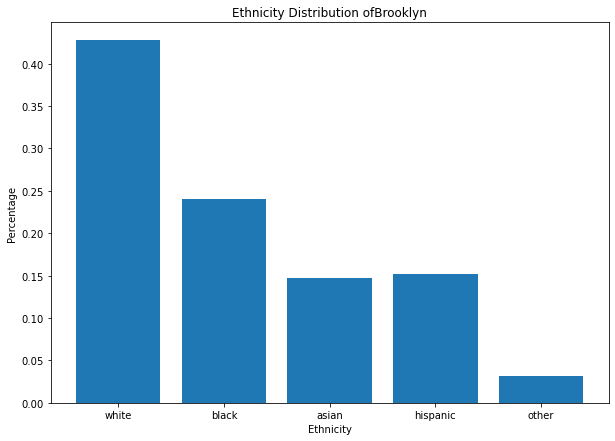

In [45]:
def show_dist(x_var, y_var, x_title, y_title, title):
    # Figure Size
    fig = plt.figure(figsize =(10, 7))

    # Horizontal Bar Plot
    plt.bar(x_var, y_var)

    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)
    
    # Show Plot
    plt.show()
    
def show_ethnicity_distribution(boro):
    boro_select = race_comp_df[race_comp_df['Boro'] == boro.code]
    
    x_var = boro_select['Ethnicity']
    y_var = boro_select["Percentage"]
    
    show_dist(x_var, y_var, 'Ethnicity', 'Percentage', 'Ethnicity Distribution of' + boro.name)
    
show_ethnicity_distribution(boroughs[1])


# def show_pov_race_dist(boro):
#     show_dist(boro, 'Ethnicity', 'Poverty Percentage', 'Ethnicity', 'Poverty Percentage', 'Poverty Rate distribution per Ethnicity' )

## Poverty Distribution By Race

In [26]:
# Taking into account all the boroughs what does the  
    
poverty_composition = {
    'Ethnicity' : [],
    'Poverty Rate' : []
}


pov_comp_df = pd.DataFrame(poverty_composition)

def calc_pov_rate_per_ethnicity(race_code):
    pov_population_for_ethnicity = len(df[(df['Ethnicity'] == race_code) & (df['Off_Pov_Stat'] == 1)])
    ethnicity_population = len(df[df['Ethnicity'] == race_code])

    return (pov_population_for_ethnicity/ethnicity_population)


for i in range(len(races)):
    curr_race = races[i]
    pov_comp_df = pov_comp_df.append({'Ethnicity': curr_race['Name'], 'Poverty Rate' : calc_pov_rate_per_ethnicity(curr_race['Code'])}, ignore_index = True) 


print(pov_comp_df)



  Ethnicity  Poverty Rate
0     white      0.096719
1     black      0.154332
2     asian      0.137727
3  hispanic      0.206500
4     other      0.110733


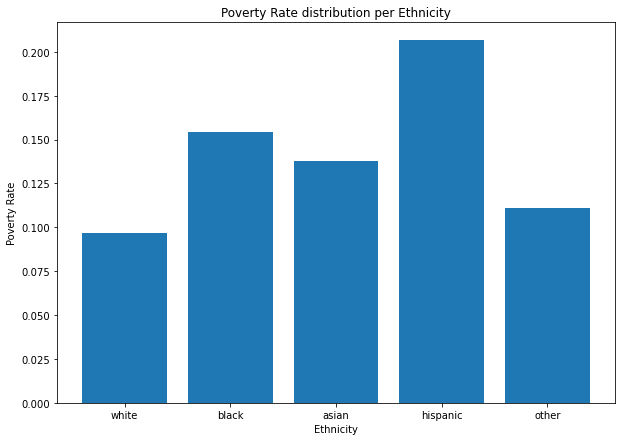

In [49]:
def show_pov_race_dist(boro):
    x_var = pov_comp_df['Ethnicity']
    y_var = pov_comp_df['Poverty Rate']
    
    show_dist(x_var, y_var, 'Ethnicity', 'Poverty Rate', 'Poverty Rate distribution per Ethnicity' )
    
    
show_pov_race_dist(boroughs[0])

## Save Statistics to File

In [ ]:
# outputFile = open('poverty_stats.txt', 'w')

# def write_all():
#     for i in range(len(boroughs)):
#             outputFile.write(boroughs[i].to_string() + "\n")
# write_all()

# outputFile.close()


